In [3]:
import numpy as np
import pandas as pd

housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


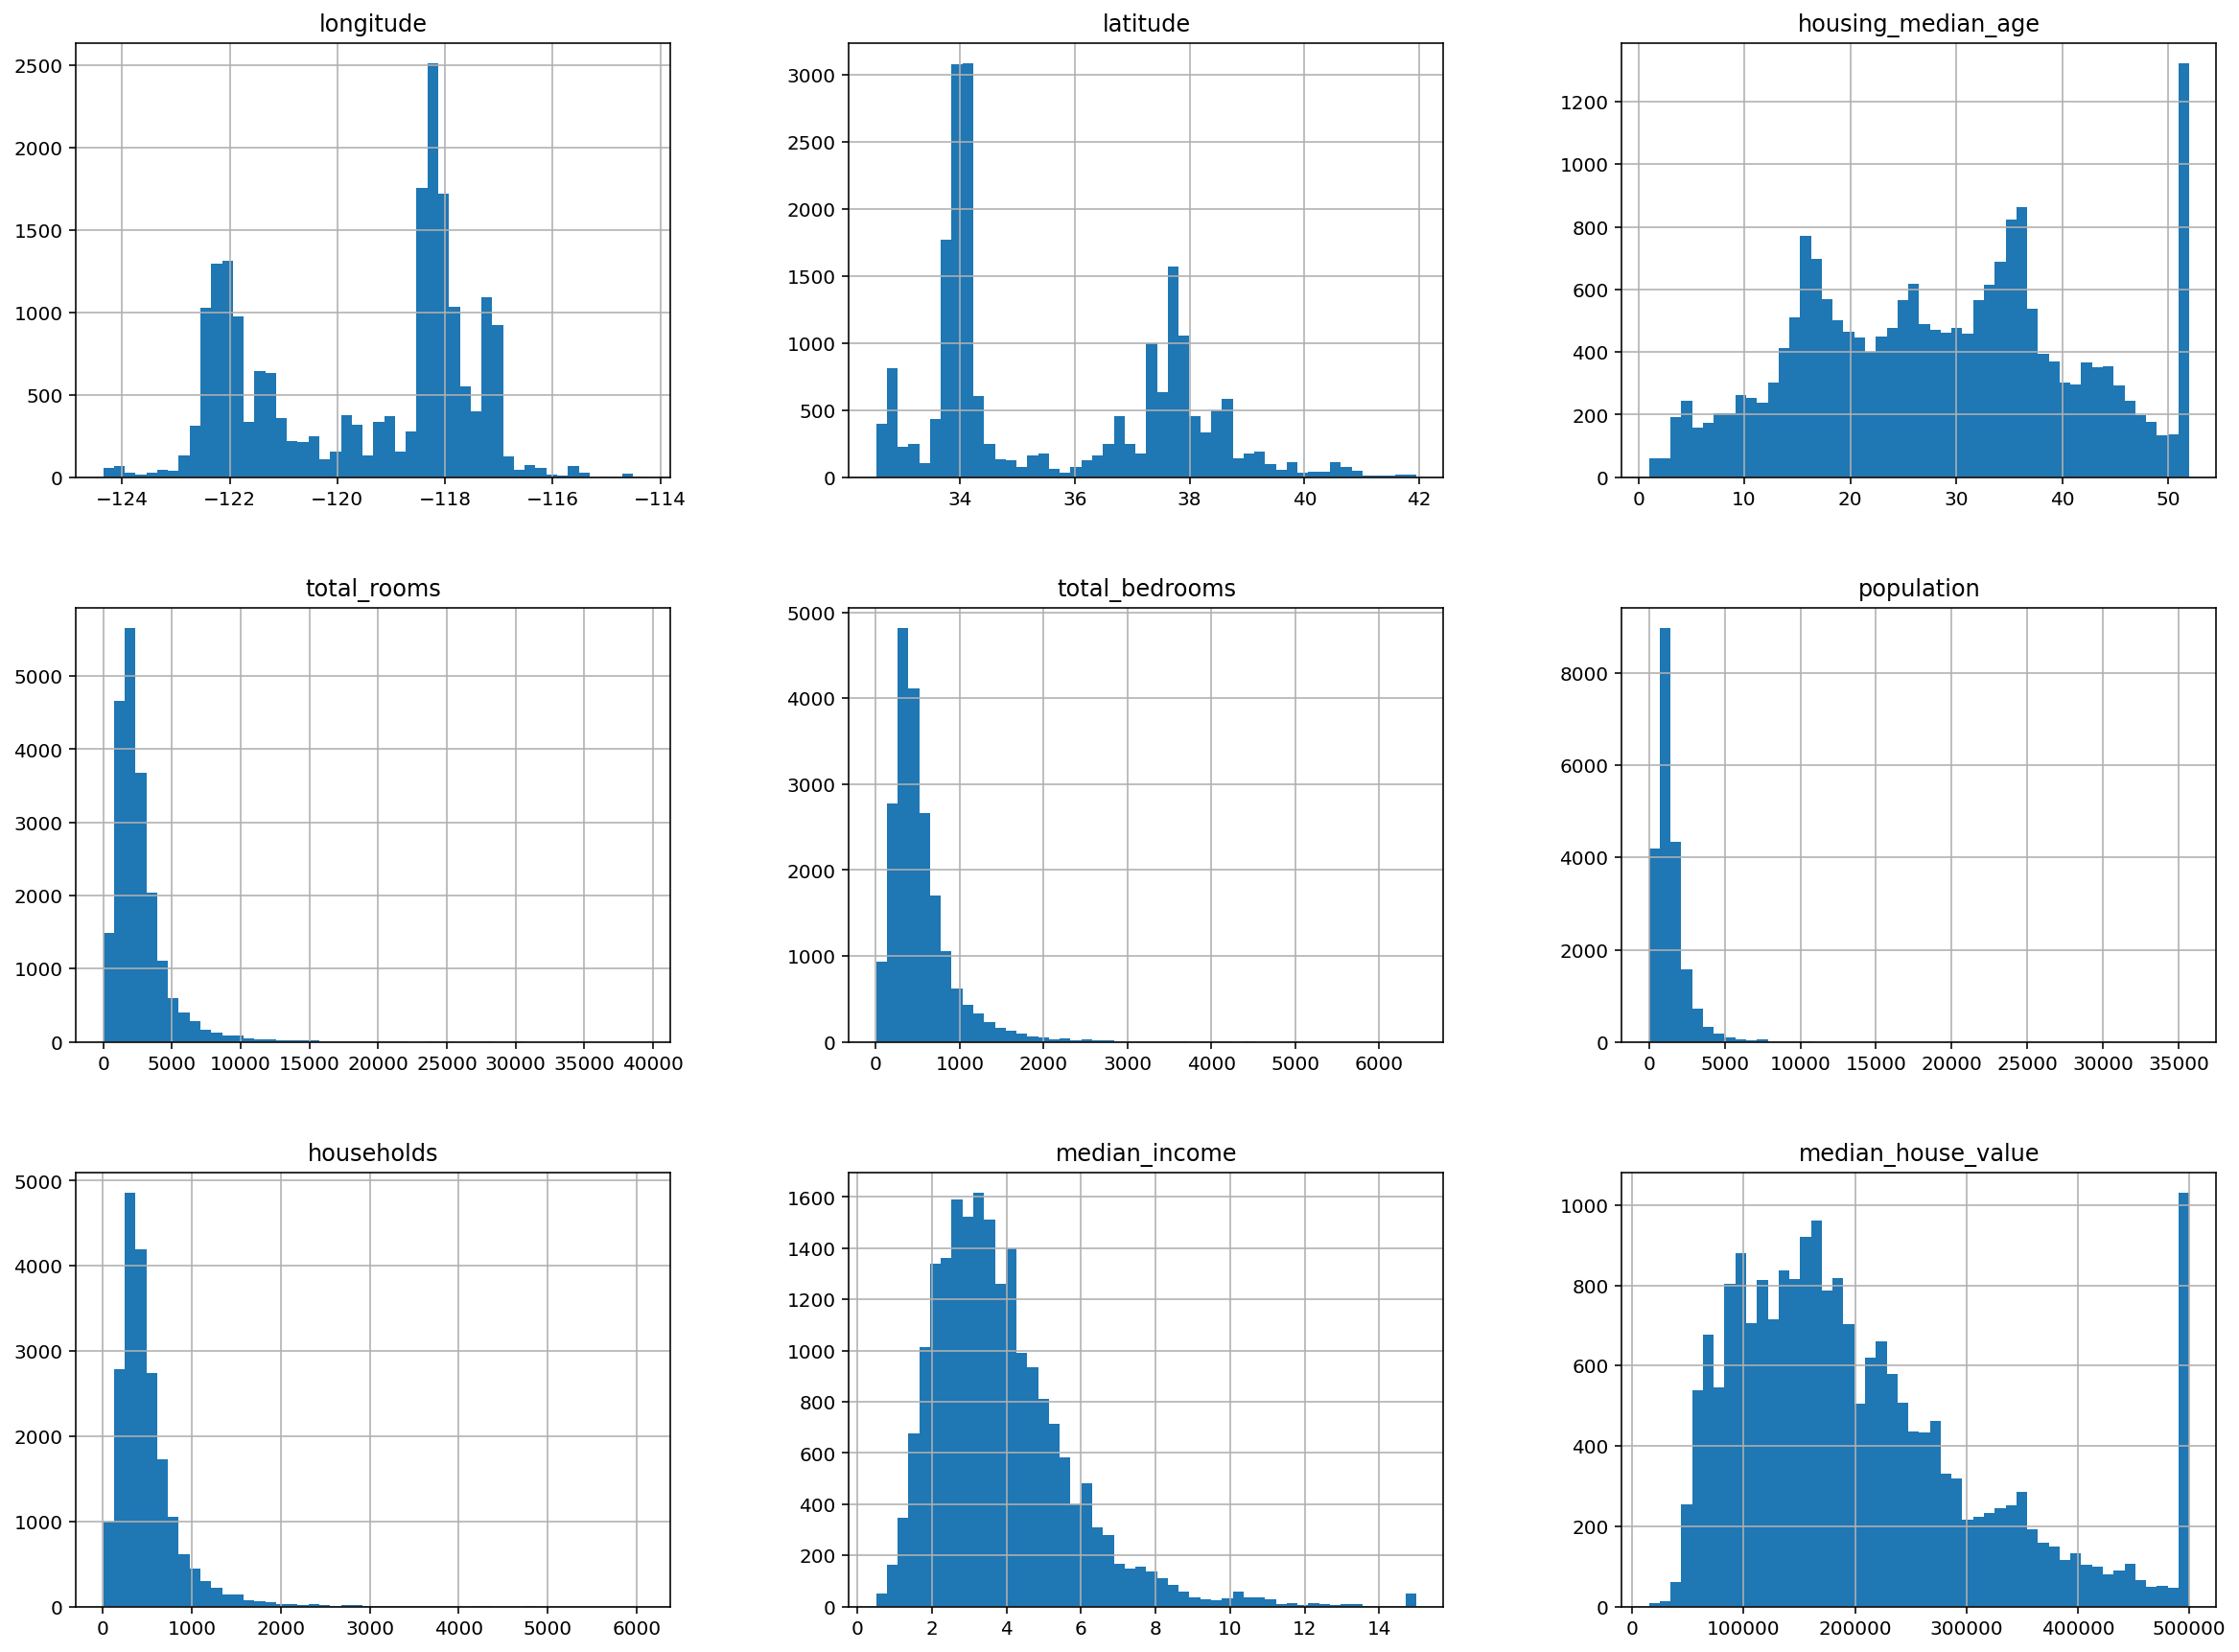

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
housing.hist(bins=50,  figsize=(20, 15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

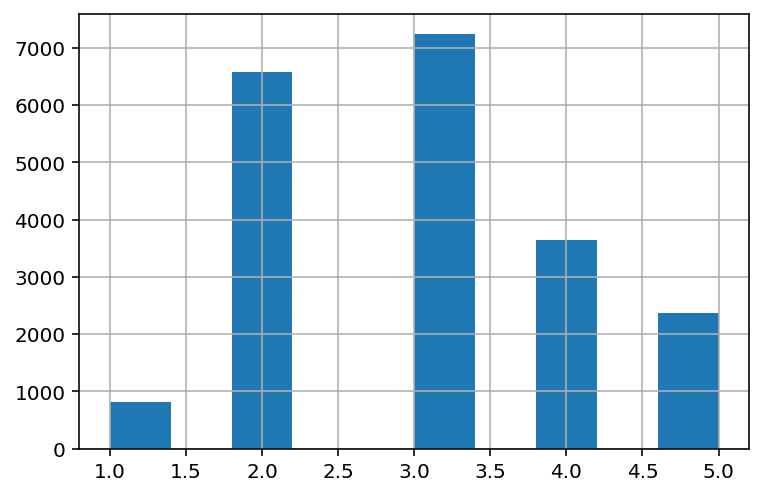

In [11]:
housing["income_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [13]:
(strat_test_set["income_cat"].value_counts() / len(strat_test_set)) - (strat_train_set["income_cat"].value_counts() / len(strat_train_set))

3   -0.000061
2   -0.000061
4    0.000061
5    0.000182
1   -0.000121
Name: income_cat, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [15]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND


In [16]:
H = strat_train_set.copy()

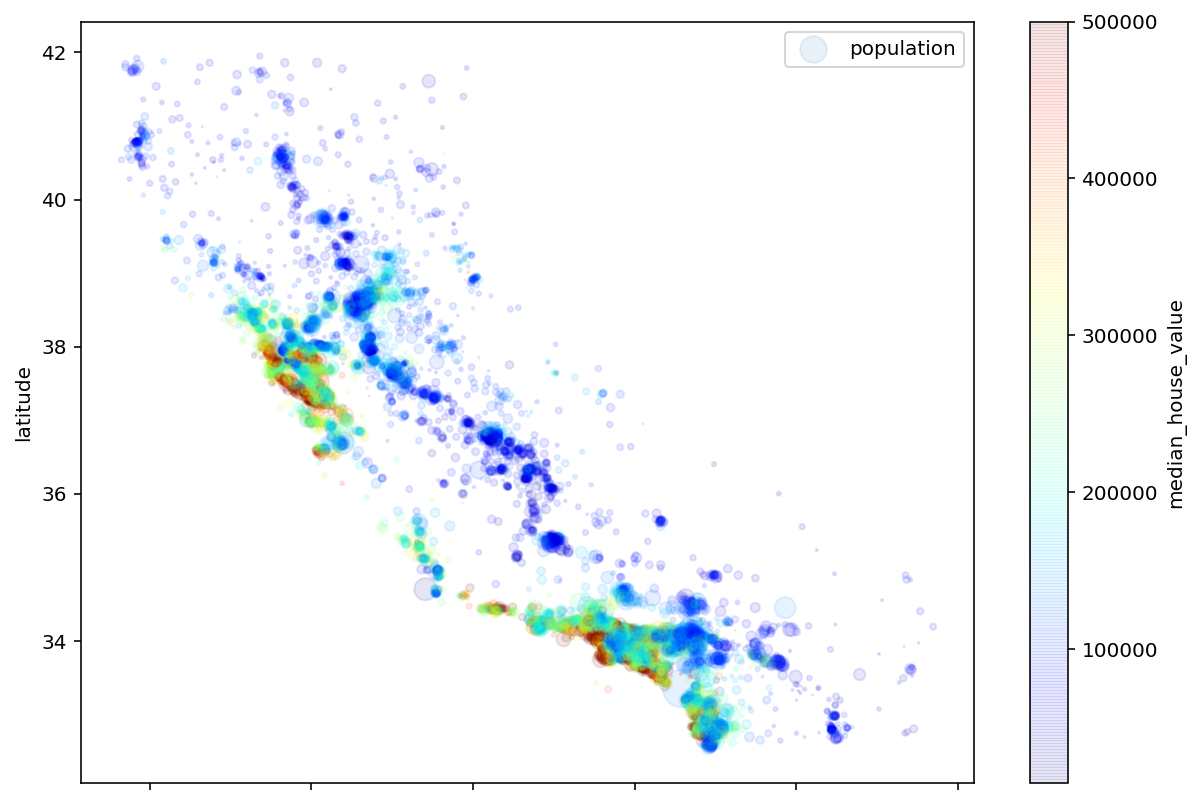

In [17]:
H.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
       s=H["population"]/100, label="population", figsize=(10, 7),
       c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [18]:
corr_matrix = H.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

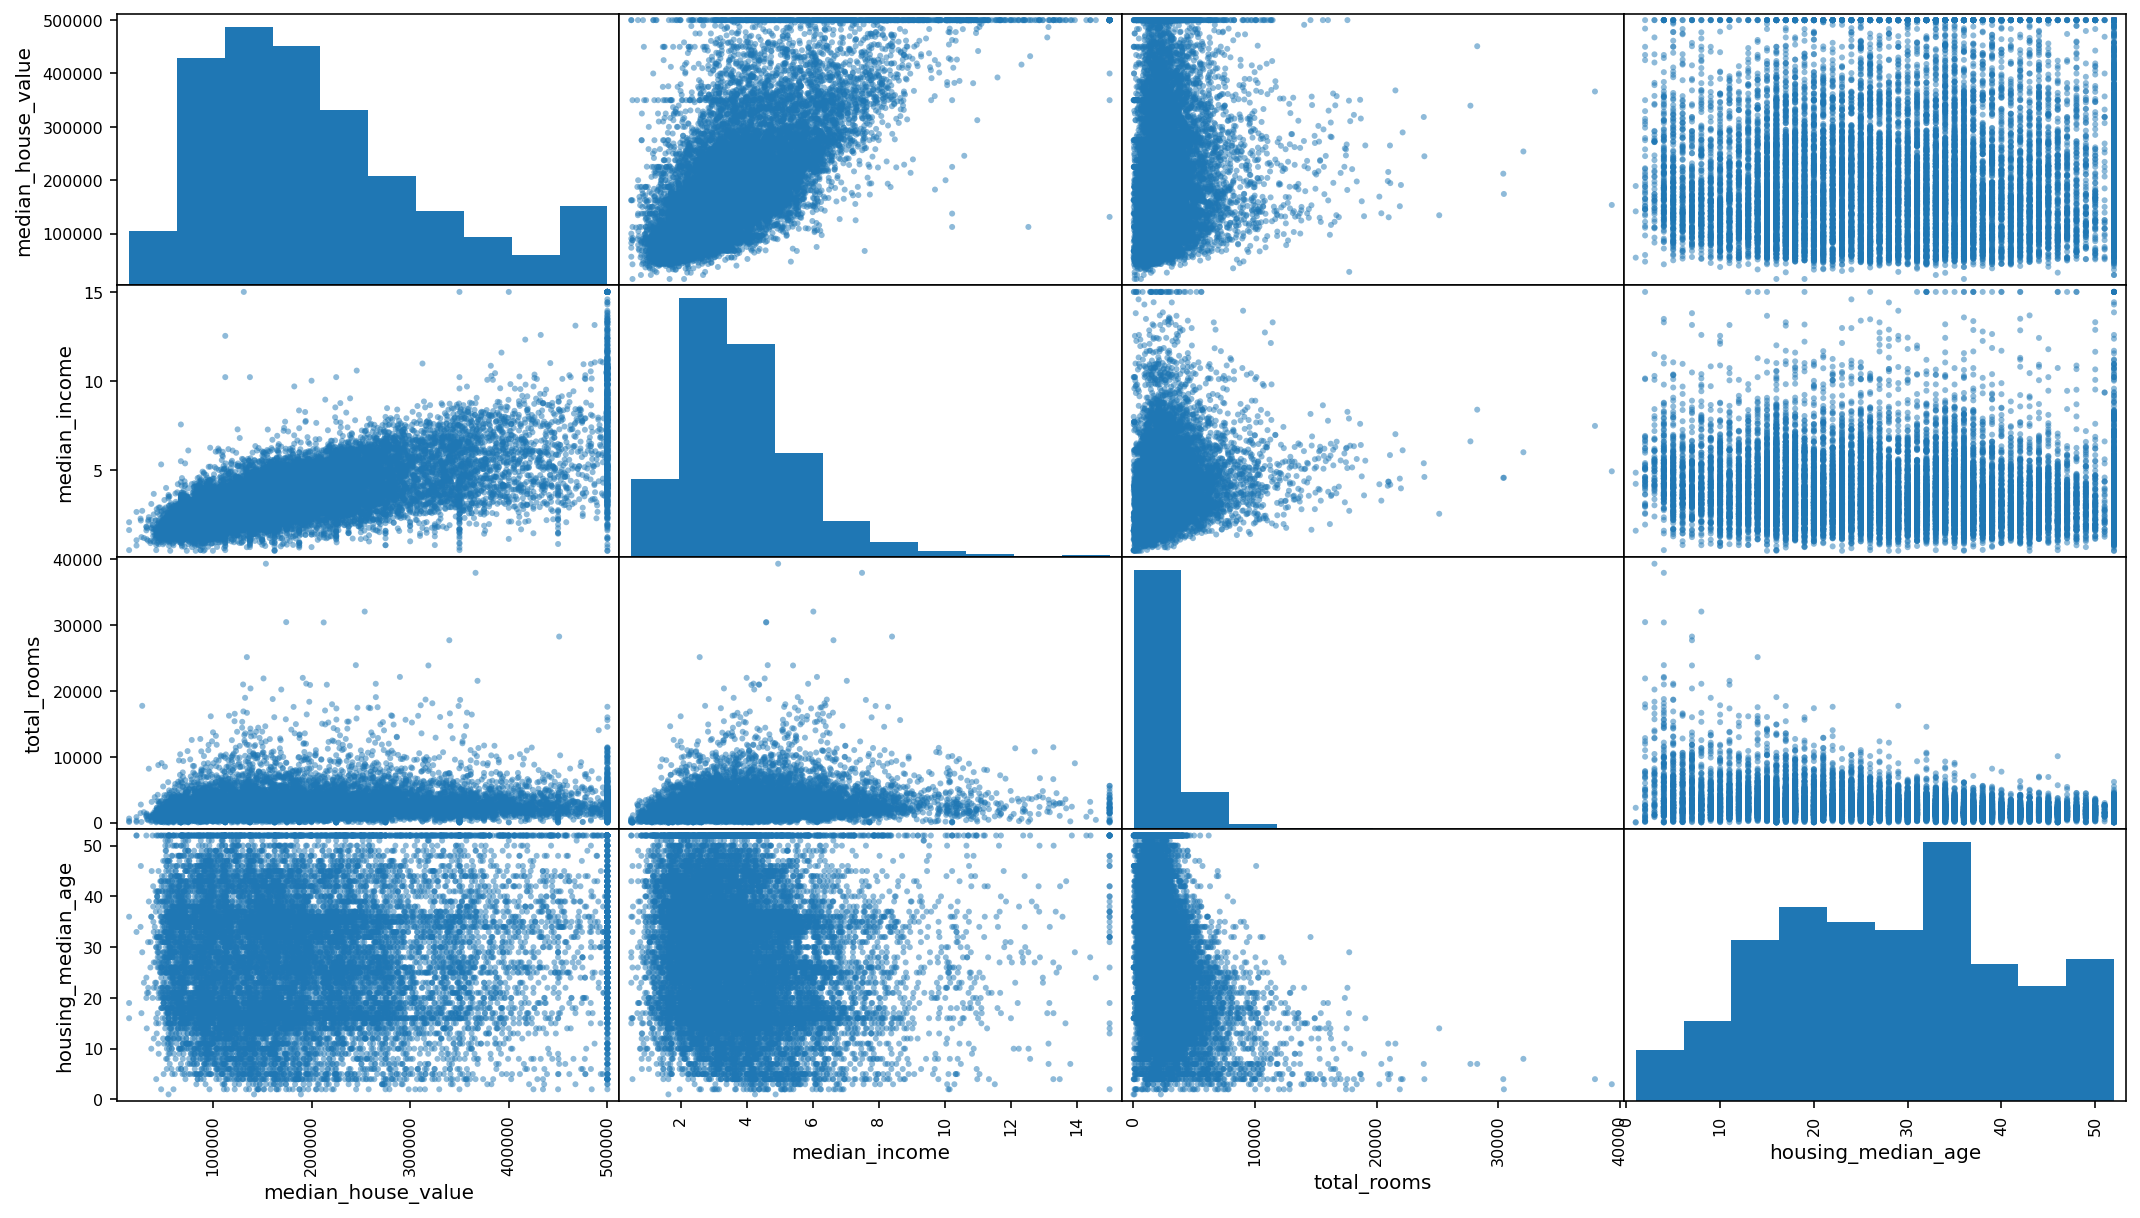

In [19]:
from pandas.plotting import scatter_matrix

attrs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(H[attrs], figsize=(18, 10))

In [20]:
H["rooms_per_households"] = H["total_rooms"] / H["households"]
H["bedrooms_per_room"] = H["total_bedrooms"] / H["total_rooms"]
H["population_per_household"] = H["population"] / H["households"]

In [21]:
H.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
bedrooms_per_room           0.259984
rooms_per_households        0.146285
latitude                    0.142724
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
longitude                   0.047432
population                  0.026920
population_per_household    0.021985
Name: median_house_value, dtype: float64

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [24]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [25]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [27]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
X = imputer.transform(housing_num)

In [29]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_tr)

In [35]:
from sklearn.compose import ColumnTransformer

num_attrs = list(housing_num)
cat_attrs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attrs),
                                   ('cat', OneHotEncoder(), cat_attrs)
])

housing_prep = full_pipeline.fit_transform(housing)
housing_prep

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prep, housing_labels)

LinearRegression()

In [37]:
data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
prepared = full_pipeline.transform(data)
lin_reg.predict(prepared)

array([211574.39523833, 321345.10513719, 210947.519838  ,  61921.01197837,
       192362.32961119])

In [38]:
labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error as mse

def rmse(a, b):
  return np.sqrt(mse(a, b))

housing_predictions = lin_reg.predict(housing_prep)
lin_rmse = rmse(housing_labels, housing_predictions)
lin_rmse

69050.98178244587

In [40]:
 from sklearn.tree import DecisionTreeRegressor

 tree_reg = DecisionTreeRegressor()
 tree_reg.fit(housing_prep, housing_labels)

 housing_predictions = tree_reg.predict(housing_prep)
 tree_rmse = rmse(housing_labels, housing_predictions) 
 tree_rmse

0.0

In [41]:
from sklearn.model_selection import cross_val_score as cvs

scores = cvs(tree_reg, housing_prep, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

69693.76447543513

In [42]:
scores = cvs(lin_reg, housing_prep, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores.mean()

69223.18594556303

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

scores = cvs(tree_reg, housing_prep, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

69387.80396834252

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prep, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [46]:
param_grid = [
              {'n_estimators': [30, 40, 50], 'max_features': [5, 6, 7]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prep, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 6, 7],
                          'n_estimators': [30, 40, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 50}

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

50547.345909830605 {'max_features': 5, 'n_estimators': 30}
50158.25267411452 {'max_features': 5, 'n_estimators': 40}
50012.34707694913 {'max_features': 5, 'n_estimators': 50}
50464.41340621664 {'max_features': 6, 'n_estimators': 30}
50047.115050005734 {'max_features': 6, 'n_estimators': 40}
50081.37518277879 {'max_features': 6, 'n_estimators': 50}
50424.69207903854 {'max_features': 7, 'n_estimators': 30}
49885.19410656729 {'max_features': 7, 'n_estimators': 40}
49748.76868867254 {'max_features': 7, 'n_estimators': 50}


In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attr = list(cat_encoder.categories_[0])
attr = num_attrs + cat_one_hot_attr
sorted(zip(feature_importances, attr), reverse=True)

[(0.43096182524058885, 'median_income'),
 (0.1463149765514242, 'INLAND'),
 (0.11401913859972222, 'longitude'),
 (0.108089284957357, 'latitude'),
 (0.048242944353319835, 'housing_median_age'),
 (0.040038809807877065, 'population'),
 (0.0317423185617656, 'total_rooms'),
 (0.028848801733710724, 'total_bedrooms'),
 (0.02705800177501644, 'households'),
 (0.011909659232721886, '<1H OCEAN'),
 (0.008054231926651832, 'NEAR OCEAN'),
 (0.004690751486127078, 'NEAR BAY'),
 (2.925577371734551e-05, 'ISLAND')]

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prep = full_pipeline.transform(X_test)

In [52]:
final_pred = final_model.predict(X_test_prep)


final_rmse = rmse(y_test, final_pred)
final_rmse


47340.4862921991